# Исследование рынка российского кинопроката

# Описание:

Заказчик этого исследования — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Данными, опубликованны на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

# Откройте файлы с данными и объедините их в один датафрейм

Объедините данные таким образом, чтобы все объекты из
датасета mkrf_movies обязательно вошли в получившийся датафрейм.

In [1]:
import pandas as pd #ипортируем библиотеки
import matplotlib as plt

In [2]:
data_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv', sep=',') #сохраним в переменную data_movies таблицу 1
data_movies.head() 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
data_movies.info() #изучим информацию о таблице с помощью info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
# в строках есть пробельные символы. В строке 1787 пропуск. Заменим их нулем. 
# приведем строки номера прокатных удостоверений к числовым значениям
data_movies[~data_movies['puNumber'].str.isdigit()]
data_movies.loc[804, 'puNumber'] = data_movies.loc[804, 'puNumber'].strip()
data_movies.loc[1797, 'puNumber'] = '0'
data_movies['puNumber'] = data_movies['puNumber'].astype('int')

Проблема с номерами прокатных удостоверений решена

In [5]:
data_movies.info() #проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
data_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv', sep=',') #сохраним в переменную data_shows таблицу 2
data_shows

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


In [7]:
data_shows.info() #изучим информацию о таблице с помощью info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
data = data_movies.merge(data_shows, how='outer') # с помощью метода merge() сохраним в data  объединенные по столбцу puNumber 1 и 2 таблицы и сохраним данные из обоих таблиц 
data.head(5) #проверим корректность соединения

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [9]:
data.tail(5) #проверим корректность соединения

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн",NaN


Появился новый столбец box_office — сборы в рублях.

In [10]:
data.info() #изучим информацию о таблице с помощью info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Данные объединили, ничего не потерялось

# 2 Предобработка данных: 

In [11]:
data = data.rename(columns={'puNumber':'pu_number'}) #переименуем название столбца puNumber 
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

**Смена формата даты в show_start_date**

In [12]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S') #изменяем формат даты
data.head(2) #проверим

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


В колонке с датой тип поменял

**Обработка пропусков**

In [13]:
data.isna().sum() #проверим пропуски

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Проверим категориальные столбцы с пропусками 

In [14]:
data[data['genres'].isna()] #проверка столбца  genres

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.0
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data[data['production_country'].isna()] #проверка стлбца  production_country
data[data['director'].isna()] #проверка стлбца  director
data[data['producer'].isna()] #проверка стлбца  producer

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"драма,мелодрама,военный",NaN


In [16]:
data[data['film_studio'].isna()] #проверка стлобца  film_studio
data[data['production_country'].isna()] #проверка стлобца  production_country

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Я думаю, что пропуски в отдельных стобцах (категориальных) можно заполнить с помощью цикла заполнить заглушкой unknown. Эти данные мы все равно никак заполнить не сможем.

In [17]:
# Перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['genres', 'producer', 'film_studio', 'director', 'production_country', 'financing_source'] 
for columns in columns_to_replace:
    data[columns] = data[columns].fillna('unknown')

In [18]:
data.isna().sum() #проверка

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                   967
genres                      0
box_office               4328
dtype: int64

**Проверка столбца  nonrefundable_support, refundable_support, financing_source**

In [19]:
data.loc[(data['refundable_support'].isna() == False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,unknown,2.814000e+04
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN


In [20]:
data['refundable_support'].describe() #Проверка describe()

count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

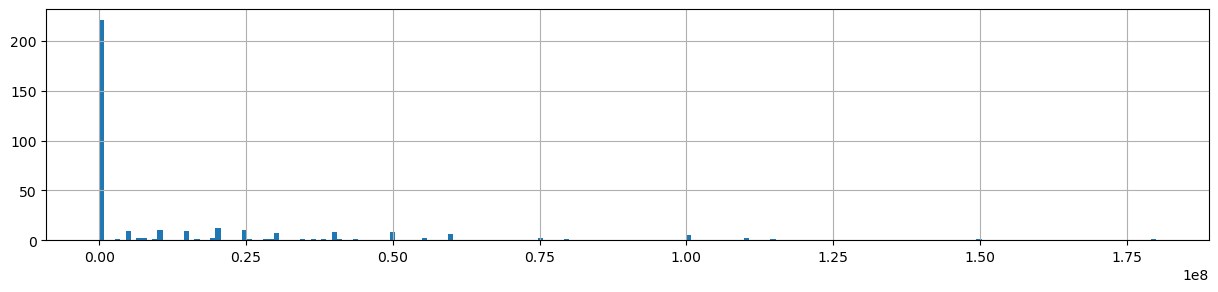

In [21]:
data['refundable_support'].hist(bins = 200, figsize = (15,3)); #Проверка

Данные в refundable_support выглядят верными. Объём возвратных средств государственной поддержки может быть равен 0(минимальное значение), так как фильмы могут не получать такой тип поддержки.  

In [22]:
data.loc[(data['nonrefundable_support'].isna() == False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,unknown,2.814000e+04
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN


In [23]:
data['nonrefundable_support'].describe()

count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

Данные в nonrefundable_support выглядят тоже нормальными. Объём возвратных средств государственной поддержки может быть равен 0(минимальное значение), так как фильмы могут не получать такой тип поддержки.

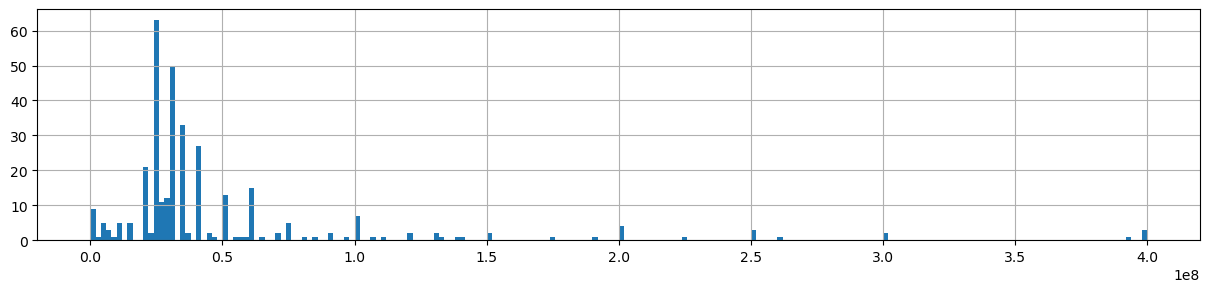

In [24]:
data['nonrefundable_support'].hist(bins = 200, figsize = (15,3)); #Проверка

**Вывод:**

Есть два вида финансирования: министерство культуры и фонд кино. Фильмы получают различного типа поддержку (возвратную и нет), потому и в графе встречаются 0. Если поодержки нет, то и источник финансирования нет. Оставим данные в таком виде.

**Проверка столбца budget**

In [25]:
data[data['budget'].isna()] #проверка столбца  budget

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,NaN,unknown,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,unknown,NaN,unknown,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,unknown,NaN,unknown,NaN


In [26]:
data.loc[(data['budget'].isna() == False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,unknown,2.814000e+04
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN


In [27]:
data['budget'].describe()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

Бюджет фильма не может быть 0.

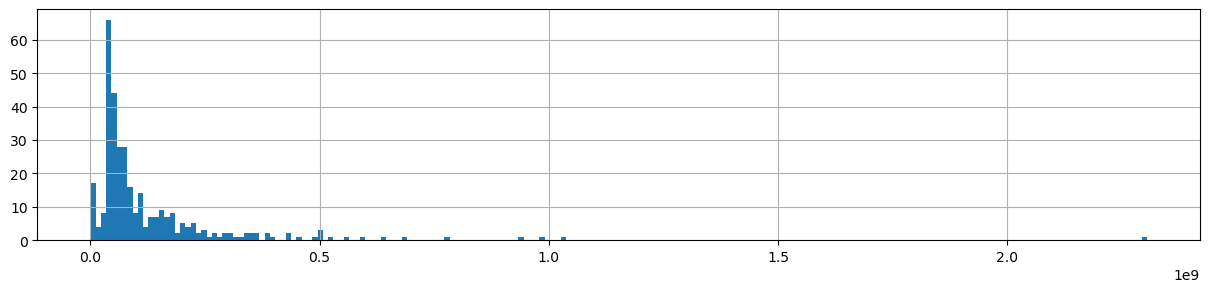

In [28]:
data['budget'].hist(bins = 200, figsize = (15,3)); #Проверка

In [29]:
data[data['budget'] == 0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


**Вывод:**


столбцы refundable_support, nonrefundable_support, financing_source, budget имеют одинаковые пропуски. Похоже, что начения есть только у фильмов, которым оказывалась поддержка. Оставим их, так как в них есть много другой полезной инфонрмации.

Найдем сумму полной поддержки фильмов 

In [30]:
data['support'] = data['nonrefundable_support'] + data['refundable_support'] #объединим данные из nonrefundable_support и refundable_support
data.head(10) #проверка support
data['support'].value_counts() #проверка support

25000000.0    48
30000000.0    44
40000000.0    24
35000000.0    21
50000000.0    16
              ..
21700000.0     1
27510000.0     1
24986000.0     1
25345000.0     1
50123915.0     1
Name: support, Length: 90, dtype: int64

In [31]:
data['support'].describe() #проверка support

count    3.320000e+02
mean     6.084545e+07
std      7.275546e+07
min      3.000000e+06
25%      2.533375e+07
50%      3.500000e+07
75%      6.000000e+07
max      5.000000e+08
Name: support, dtype: float64

Заполним budget поддержкой support скорректировав ее на долю участия государства в бюджете.

In [32]:
percent = (data['support'] / data['budget']).median()
percent #медиана доли участия государства в бюджете 

0.6140376284219444

In [33]:
def new_budget(row): #заполним  в budget функцией значения где budget меньше поддержки
    if row['budget'] < row['support']:
        return row['support'] / percent
    return row['budget']

In [34]:
data['budget'] = data.apply(new_budget, axis = 1)

In [35]:
data['budget'].describe() #проверка нулевых значений budget

count    3.320000e+02
mean     1.340578e+08
std      1.876855e+08
min      9.771388e+06
25%      4.615397e+07
50%      7.459255e+07
75%      1.500021e+08
max      2.305074e+09
Name: budget, dtype: float64

In [36]:
data[data['budget'] == 0] #проверка нулевых значений budget

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support


In [37]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                   967
genres                      0
box_office               4328
support                  7154
dtype: int64

**Проверим столбец box_office**

In [38]:
data[data['box_office'].isna()] #проверка стлбца  box_office

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.2,"боевик,драма,мелодрама",NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,6.6,"драма,военный",NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,NaN,unknown,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,5.4,"боевик,триллер",NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,unknown,NaN,unknown,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,unknown,NaN,unknown,NaN,NaN


In [39]:
data['box_office'].describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

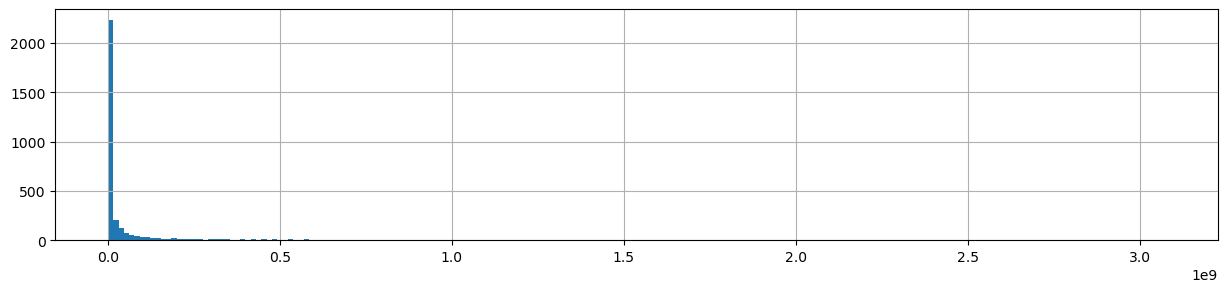

In [40]:
data['box_office'].hist(bins = 200, figsize = (15,3)); #Проверка

Очень  много значений с 0. На некоторые фильмы конечно может никто не ходить, но не в таком количестве.

In [41]:
data.loc[data['box_office'] == 0] #проверим значения сборы равны 0

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,7.7,"драма,биография,музыка",0.0,NaN
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,8.2,драма,0.0,NaN
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,6.3,комедия,0.0,NaN
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,6.5,"драма,военный,история",0.0,NaN
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,7.4,"аниме,мультфильм,драма",0.0,NaN
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,7.7,"аниме,мультфильм,фантастика",0.0,NaN
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,7.9,биография,0.0,NaN
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,5.5,"комедия,мелодрама",0.0,NaN
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,5.8,"мелодрама,комедия,драма",0.0,NaN
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,6.9,драма,0.0,NaN


In [42]:
data.loc[data['box_office'] != 0] #проверим значения сборы не равны 0

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.2,"боевик,драма,мелодрама",NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,6.6,"драма,военный",NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,NaN,unknown,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,5.4,"боевик,триллер",NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,unknown,NaN,unknown,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,unknown,NaN,unknown,NaN,NaN


**Вывод:**


Странные значения где сборы равны 0 в столбце box_office. Возмодно, что данных по этим фильмам с пропусками просто нет. Адекватной замены эти данным тоже нет. Удалим, чтобы лучше увидеть срднее значениее и медиану.

In [43]:
data = data.loc[data['box_office'] != 0] #перезапишем переменную data удалив значения, где сборы равны 0
data[data['box_office'] == 0] #проверка

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support


In [44]:
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7462 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7462 non-null   object             
 1   pu_number              7462 non-null   int64              
 2   show_start_date        7462 non-null   datetime64[ns, UTC]
 3   type                   7462 non-null   object             
 4   film_studio            7462 non-null   object             
 5   production_country     7462 non-null   object             
 6   director               7462 non-null   object             
 7   producer               7462 non-null   object             
 8   age_restriction        7462 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [45]:
data.isna().sum() #проверка пропусков 

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7130
nonrefundable_support    7130
budget                   7130
financing_source            0
ratings                   963
genres                      0
box_office               4328
support                  7130
dtype: int64

**Замена значений в 'ratings'**

In [46]:
data

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.2,"боевик,драма,мелодрама",NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,6.6,"драма,военный",NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,NaN,unknown,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,5.4,"боевик,триллер",NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,unknown,NaN,unknown,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,unknown,NaN,unknown,NaN,NaN


In [47]:
data['ratings'].unique() #проверка значений unique() 

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '94%', '62%', '79%', '90%', '19%',
       '88%', '91%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Значения с процентами удалим, потому что это не рейтинг, а что-то вроде ожидания и переводить это в десятибальную шкалу неверно, так как рейтинг этих фильмов явно не будет соответствовать и должен быть ниже. Также явно заполнять средним или медианой тоже плохой вариант. Удалим значения с % и заменим все пропуски на 0. 

In [48]:
#заменим значения в ratings
data.loc[data['ratings'].str.contains('%') == True, 'ratings'] = 0 

In [49]:
data['ratings'] = data['ratings'].fillna(0)
data['ratings'] = data['ratings'].astype('float') #заменим тип на ratings
(data['ratings'] == 0).sum() #проверка
data[data['ratings'] == 0] 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,0.0,unknown,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,0.0,unknown,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,0.0,unknown,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,unknown,0.0,unknown,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,0.0,unknown,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,unknown,0.0,unknown,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,0.0,unknown,219569.0,NaN
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,0.0,unknown,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,unknown,0.0,unknown,NaN,NaN


In [50]:
data['ratings'].describe()

count    7462.000000
mean        5.618159
std         2.426293
min         0.000000
25%         5.300000
50%         6.400000
75%         7.100000
max         9.200000
Name: ratings, dtype: float64

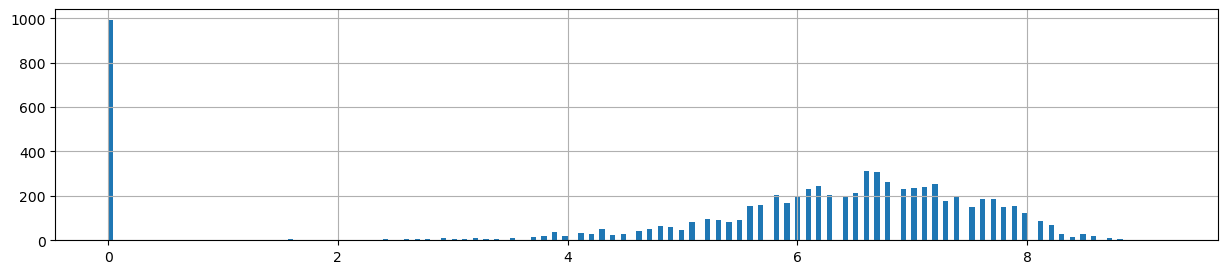

In [51]:
data['ratings'].hist(bins = 200, figsize = (15,3)); #Проверка

После наших изменений данные выглядят некорректно. А также рейтинг с 0 неправдоподобен.

Рейтинг это ценная информация, но не ключевая, данные о сборах и бюджете для этого исследования важнее терять их не хочется.

Так мы потеряем более 10% наших данных. Рейтинг не единственная и не самая важная колонка в нашем наборе данных. На графике видно, что нулевые значения не встречаются в нашем наборе, так что вполне можно оставить все как есть. При анализе рейтинга отфильтруем нулевые значения или на этапе заполенния и устранения проблем с процентами заменить все некорректные значения на NaN.

In [52]:
#data = data.loc[data['ratings'] != 0] #Удалим знаяения 0 
#data[data['ratings'] == 0] #Проверка

In [53]:
data['ratings'].isna().sum() #проверка пропусков 
data['ratings'].unique() #проверка unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [54]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7130
nonrefundable_support    7130
budget                   7130
financing_source            0
ratings                     0
genres                      0
box_office               4328
support                  7130
dtype: int64

**Проверим дубликаты**

In [55]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.2,"боевик,драма,мелодрама",NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,6.6,"драма,военный",NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN


In [56]:
data.duplicated().sum() #проверка на явные дубликаты во всем датафрейме

0

In [57]:
for i in data.columns: #проверим дубликаты во всех столбцах
    print(data[i].unique())

['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']
[221048915 111013716 221038416 ... 124010819 124010619 124010719]
<DatetimeArray>
['2015-11-27 12:00:00+00:00', '2016-09-13 12:00:00+00:00',
 '2016-10-10 12:00:00+00:00', '2016-06-10 12:00:00+00:00',
 '2015-07-29 12:00:00+00:00', '2013-10-18 12:00:00+00:00',
 '2014-12-29 12:00:00+00:00', '2016-05-05 12:00:00+00:00',
 '2014-12-01 12:00:00+00:00', '2016-06-29 12:00:00+00:00',
 ...
 '2019-12-17 12:00:00+00:00', '2019-12-10 12:00:00+00:00',
 '2019-12-16 12:00:00+00:00', '2019-12-26 12:00:00+00:00',
 '2019-12-20 12:00:00+00:00', '2019-12-27 12:00:00+00:00',
 '2019-12-23 12:00:00+00:00', '2019-12-24 12:00:00+00:00',
 '2019-12-28 12:00:00+00:00', '2019-12-30 12:00:00+00:00']
Length: 1963, dtype: datetime64[ns, UTC]
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' 

In [58]:
data.loc[data['pu_number'].duplicated() == True] #найдем дубликаты в 'pu_number'

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.6,"драма,мелодрама,история",NaN,NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,6.8,"комедия,криминал",NaN,NaN


In [59]:
data.loc[5068,'pu_number'] = 1 #вероятно это просто ошибка в pu_number, так как фильмы могут быть показаны в разно время, поэтому оставим строки и сменим им значения 
data.loc[4639,'pu_number'] = 2

**Замена значений в age_restriction**

In [60]:
#проверим значения в age_restriction 
data['age_restriction'].isna().sum() 
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Для удобства в будущем поменяем значения в age_restriction на int

In [61]:
#заменим значения на str, чтобы было удобнее с ними работать 
data.loc[data['age_restriction'] == '«18+» - запрещено для детей', 'age_restriction'] = 18
data.loc[data['age_restriction'] == '«6+» - для детей старше 6 лет', 'age_restriction'] = 6
data.loc[data['age_restriction'] == '«12+» - для детей старше 12 лет', 'age_restriction'] = 12
data.loc[data['age_restriction'] == '«16+» - для детей старше 16 лет', 'age_restriction'] = 16
data.loc[data['age_restriction'] == '«0+» - для любой зрительской аудитории', 'age_restriction'] = 0

In [62]:
data['age_restriction'].unique() #проверка
data['age_restriction'].astype('int') #pfvtybv nbg lfyys[ yf cn str]

0       18
1        6
2       18
3       18
4       18
        ..
7481    12
7482    16
7483     0
7484     0
7485     0
Name: age_restriction, Length: 7462, dtype: int64

**Дубликаты в 'title'**

In [63]:
data['title'] = data['title'].str.lower() #заменим значения на строчные в title
data.loc[data['title'].duplicated() == True] #проверим дубликаты в 'title'

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN
41,алекс и эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",16,NaN,NaN,NaN,unknown,6.4,"мелодрама,комедия",NaN,NaN
110,гарри поттер и орден феникса /по роману дж.к.р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",16,NaN,NaN,NaN,unknown,7.7,"фэнтези,приключения,семейный",759526.00,NaN
113,гарри поттер и узник азкабана /по роману дж.к....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,12,NaN,NaN,NaN,unknown,8.2,"фэнтези,приключения,семейный",1125302.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",16,NaN,NaN,NaN,unknown,7.5,"триллер,детектив,криминал",NaN,NaN
7416,"отель ""гранд будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",16,NaN,NaN,NaN,unknown,7.9,"комедия,приключения,детектив",NaN,NaN
7438,зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",18,NaN,NaN,NaN,unknown,6.5,"триллер,драма",175003.51,NaN
7450,в тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,18,NaN,NaN,NaN,unknown,6.8,"триллер,криминал,детектив",NaN,NaN


Дубликаты оставляем, так как это фильмы, которые были показаны в другое время и эти данные нам нужны.

**Дубликаты в 'type'**

In [64]:
data['type'] = data['type'].str.lower() #приведем все значения к строчному в столбце type с помощью str
data['type'] = data['type'].replace(' художественный', 'художественный') #уизбавимся от дубликатов в type
data['type'] = data['type'].replace(' анимационный', 'анимационный')
data['type'].unique() #проверка unique()
data['type'].value_counts() #проверка value_counts()

художественный                5887
анимационный                   827
прочие                         406
документальный                 288
научно-популярный               53
музыкально-развлекательный       1
Name: type, dtype: int64

**Дубликаты в financing_source**

In [65]:
data['financing_source'] = data['financing_source'].str.lower() #заменим значения на строчные в financing_source
data['financing_source'].unique() #проверка unique()
data['financing_source'] = data['financing_source'].replace('министерство культуры', 'министерство культуры')
data['financing_source'].unique() #проверка value_counts()
data['financing_source'].value_counts()

unknown                             7130
министерство культуры                164
фонд кино                            146
министерство культуры, фонд кино      22
Name: financing_source, dtype: int64

Поправили проблему в колонках с типом фильма и источником поддержки.

**Дубликаты в film_studio**

In [66]:
data['film_studio'] = data['film_studio'].str.lower() #приведем значения film_studio к строчным
data['film_studio'].unique()

array(['тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз',
       'киностудия "мосфильм"',
       'юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз',
       ...,
       'дэниел гродник продакшнз, вандерфилм медиа корпорэйшн, импринт интертейнмент, вор хорс интертейнмент, пимиента ',
       'никелодеон анимейшн студиос, спин мастер',
       'анимаккорд лтд., ооо студия "анимаккорд"'], dtype=object)

В столбце film_studio присутствует много невяных дубликатов. Например 'анимаккорд лтд., ооо студия "анимаккорд"'. Ничего делать не буду, вернусь если понадобится

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7462 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7462 non-null   object             
 1   pu_number              7462 non-null   int64              
 2   show_start_date        7462 non-null   datetime64[ns, UTC]
 3   type                   7462 non-null   object             
 4   film_studio            7462 non-null   object             
 5   production_country     7462 non-null   object             
 6   director               7462 non-null   object             
 7   producer               7462 non-null   object             
 8   age_restriction        7462 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Вывод** 

Проверили предобработку данных. В данных обработали пропуски, дубликаты, типы данных. Также устранили проблемы с разделитеелями.

Датафрейм содержит много категориальных с совершенно разными и уникальными значениями переменных во многих столбцах. В датафрейме достаточно много пропусков(значения до 2014 года). Во многих столбцах встречались проблемы с разделителями, неправильными отступами. В некоторых категориальных колонках встречались неявные дубликаты.

В столбце financing_source есть два вида финансирования: министерство культуры и фонд кино. Фильмы получают различного типа поддержку (возвратную и нет). Если поддержки нет, то и источника финансирования нет, а потому и в графе встречаются 0. Столбцы refundable_support, nonrefundable_support, financing_source, budget имеют одинаковые пропуски. Это связано с тем, что значения есть только у фильмов, которым оказывалась поддержка.  Данные в столбце  refundable_support и nonrefundable_support выглядят верными. Объём какого-то одного типа средств государственной поддержки может быть равен 0(минимальное значение), так как фильмы могут не получать такой тип поддержки. Но вот столбец  budget имеет аномалию, так как бюджет фильма не может быть 0(исправили). Очень много странных значений в столбце box_office где сборы равны 0. На некоторые фильмы, конечно, может никто не ходить, но не в таком количестве. Вероятно, что данных по этим фильмам с пропусками просто нет. Адекватной замены эти данным тоже нет(удалили). 



# Добавление новых столбцов:

**Создаем столбец 'year' с информацией о годе проката**

In [68]:
data['year'] = data['show_start_date'].dt.year #добавим информацию о годе проката в year

Создадим стлобец head_director с именем и фамилией главного режиссёра и столбец director основным жанром фильма с помощью split() hfplykb pyfxtybz

In [69]:
#Создадим стлобец head_director с именем и фамилией главного режиссёра и столбец director основным жанром фильма с помощью split() hfplykb pyfxtybz
data['head_director'] = data['director'].str.split(',').str[0] 
data['genres_head'] = data['genres'].str.split(',').str[0]
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support,year,head_director,genres_head
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,unknown,7.2,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",СССР,Е.Матвеев,unknown,6,NaN,NaN,NaN,unknown,6.6,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,unknown,6.8,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика


**Посчитаем долю поддержки для каждого фильма с информацией о бюджете.**

In [70]:
data['support_ratio'] = data['support'] / data['budget'] #доля от общего бюджета фильма составляет государственная поддержка
data.query('support_ratio > 0') #проверка

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support,year,head_director,genres_head,support_ratio
1281,пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0.0,...,79411900.0,министерство культуры,8.1,"драма,мелодрама",3.653536e+05,26500000.0,2013,А.Атанесян,драма,0.333703
1448,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",Россия,А.Якимчук,А.Тютрюмов,12,0.0,...,37142857.0,министерство культуры,0.0,unknown,2.814000e+04,26000000.0,2014,А.Якимчук,unknown,0.700000
1498,невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.0,...,176023490.0,фонд кино,5.3,"комедия,фантастика",1.995703e+07,107847945.0,2013,Р.Давлетьяров,комедия,0.612691
1524,берцы,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0.0,...,40574140.0,министерство культуры,4.2,драма,5.591750e+04,28000000.0,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,братья ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0.0,...,40015122.0,министерство культуры,6.4,драма,2.321000e+05,25000000.0,2014,М.Угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,"зао ""дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12,100000000.0,...,980000000.0,фонд кино,6.0,"история,биография,драма",7.177032e+08,500000000.0,2019,А.Кравчук,история,0.510204
7466,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00+00:00,анимационный,"ооо ""студия анимационного кино ""мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",6,100000000.0,...,190000000.0,фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,100000000.0,2019,Д.Шмидт,мультфильм,0.526316
7474,вторжение,111022519,2019-12-23 12:00:00+00:00,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12,100000000.0,...,944000000.0,фонд кино,5.7,"фантастика,боевик",NaN,500000000.0,2019,Ф.Бондарчук,фантастика,0.529661
7476,я свободен,111023019,2019-12-26 12:00:00+00:00,художественный,"ао ""тпо ""киностудия им. м.горького""",Россия,И.Северов,С.Зернов,12,0.0,...,46154000.0,министерство культуры,5.9,драма,NaN,30000000.0,2019,И.Северов,драма,0.649998


In [71]:
data['support_ratio'].describe()

count    332.000000
mean       0.522335
std        0.166987
min        0.044043
25%        0.384615
50%        0.613364
75%        0.654613
max        0.784745
Name: support_ratio, dtype: float64

**Расчитал долю от общего бюджета фильма составляет государственная поддержка.**

In [72]:
data.info() #проверка info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7462 entries, 0 to 7485
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7462 non-null   object             
 1   pu_number              7462 non-null   int64              
 2   show_start_date        7462 non-null   datetime64[ns, UTC]
 3   type                   7462 non-null   object             
 4   film_studio            7462 non-null   object             
 5   production_country     7462 non-null   object             
 6   director               7462 non-null   object             
 7   producer               7462 non-null   object             
 8   age_restriction        7462 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

# Исследовательский анализ данных

**Рассмотрим количество фильмов в прокате в год**

In [73]:
movie_year_count = data.pivot_table(index='year', values=['pu_number'], aggfunc=['count'])
movie_year_count.describe()

,count
,pu_number
count,10.000000
mean,746.200000
std,160.958794
min,505.000000
25%,622.750000
50%,751.500000
75%,872.500000
max,981.000000


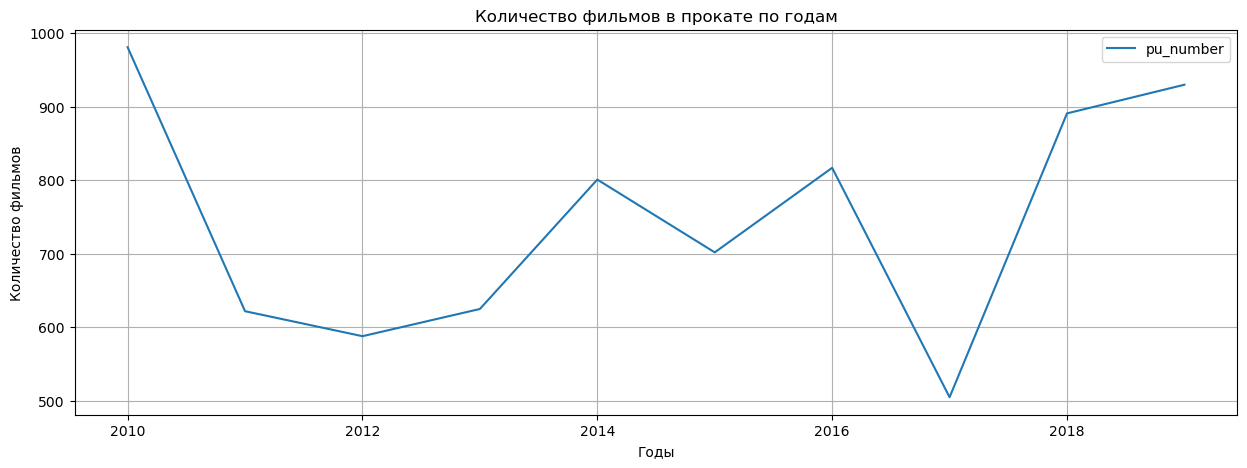

In [74]:
movie_year_count.plot(figsize=(15,5), title='Количество фильмов в прокате по годам', grid = True, y='count', ylabel='Количество фильмов', xlabel='Годы');

Наибольшее коичество фильмов вышло в 2010 году(908). Минимальное значение составило в 2017 году(434). Среднее в период с 2010 по 2019 год составило 635 фильмов в год.

**Расчитаем какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах**

In [75]:
(data['box_office'].count() / len(data['box_office'])) * 100 #разделим колисво строк без пропусков на число все строк

41.99946395068346

Доля фильмов с указанной информацией о прокате в кинотеатрах составляет 44,5%

**Рассмотрим динамику проката по годам**

In [76]:
box_year = data.pivot_table(index='year', values=['box_office'], aggfunc=['sum'])
box_year.describe()

,sum
,box_office
count,1.000000e+01
mean,2.415197e+10
std,2.413828e+10
min,2.428654e+06
25%,1.802700e+07
50%,2.347116e+10
75%,4.828586e+10
max,4.966840e+10


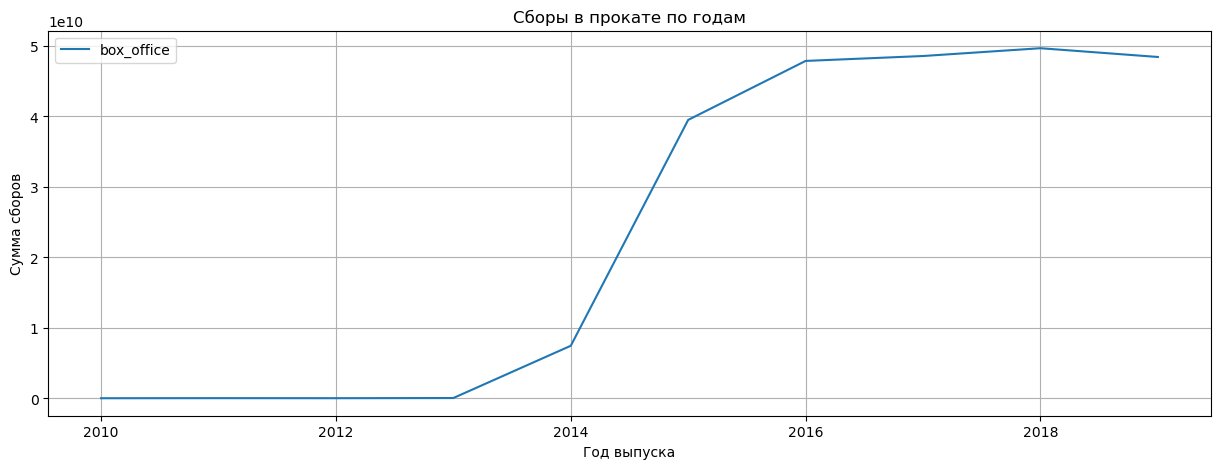

In [77]:
box_year.plot(figsize=(15,5), title='Cборы в прокате по годам', grid = True, y='sum', ylabel='Cумма сборов', xlabel='Год выпуска');

Странность значений на графике в период с 2010 года по 2013 год объясняется большим количеством нулевых значений в box_office

Но при этом у нас есть информация о прокате только для 40% фильмов, возможно большинство из них были выпущены как раз до 2014 года.

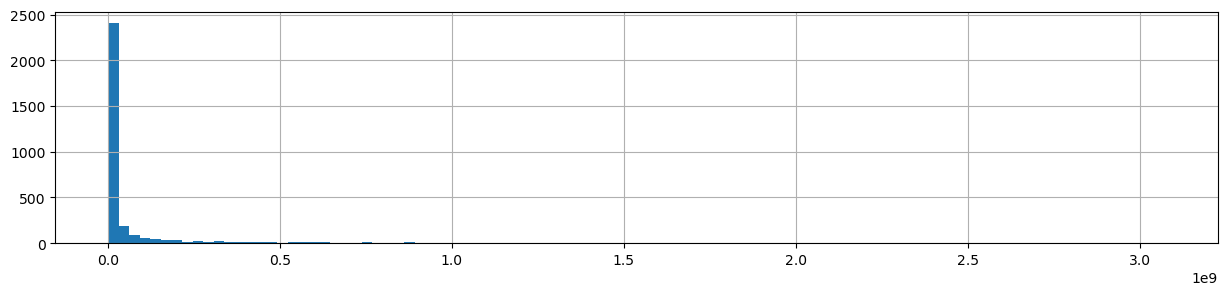

In [78]:
data['box_office'].hist(bins = 100, figsize = (15,3)); 

Значения выглядет подозрительно, много значений около нуля

''

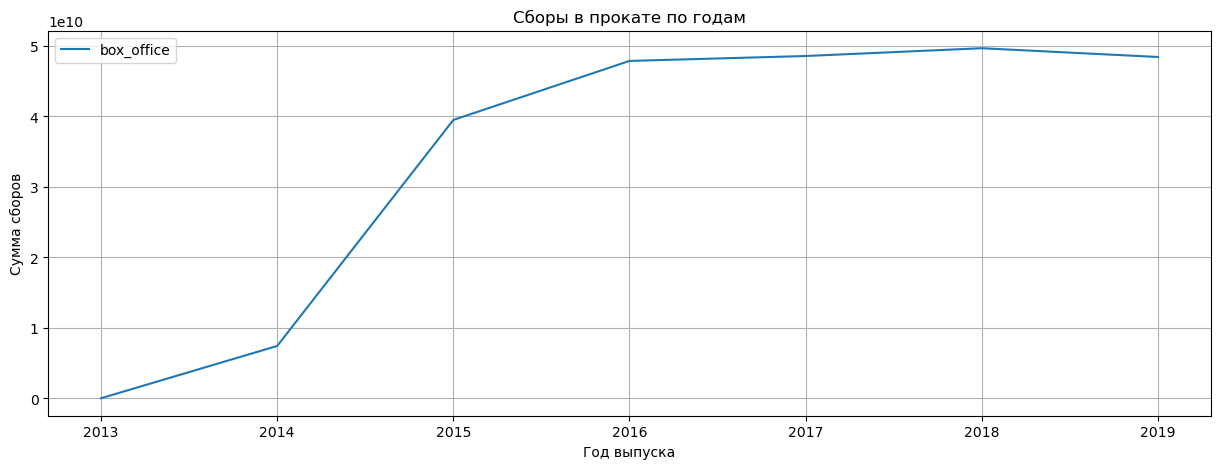

In [79]:
data.query('year >= 2013').pivot_table(index='year', values=['box_office'], aggfunc=['sum']).plot(figsize=(15,5), title='Cборы в прокате по годам', grid = True, y='sum',ylabel='Cумма сборов', xlabel='Год выпуска' )
;

Максимальная сумма сборов была в 2019 году и составила 49 млрд руб. На грифике мы видим скачок роста сборов в период с 2014 года по 2016 год 

**Рассмотрим среднюю и медианную сумму сборов для каждого года.**

In [113]:
pivot_box = data.pivot_table(index='year', values='box_office', aggfunc = ['mean', 'median'])
pivot_box

,mean,median
,box_office,box_office
year,,
2010,"24,046.08","1,710.00"
2011,"129,383.17","3,000.00"
2012,"56,548.15","6,220.00"
2013,"166,478.81","3,580.00"
2014,"27,270,885.93","20,400.00"
2015,"85,492,132.46","5,003,450.15"
2016,"91,173,904.27","3,915,041.02"
2017,"136,032,793.33","9,968,340.00"


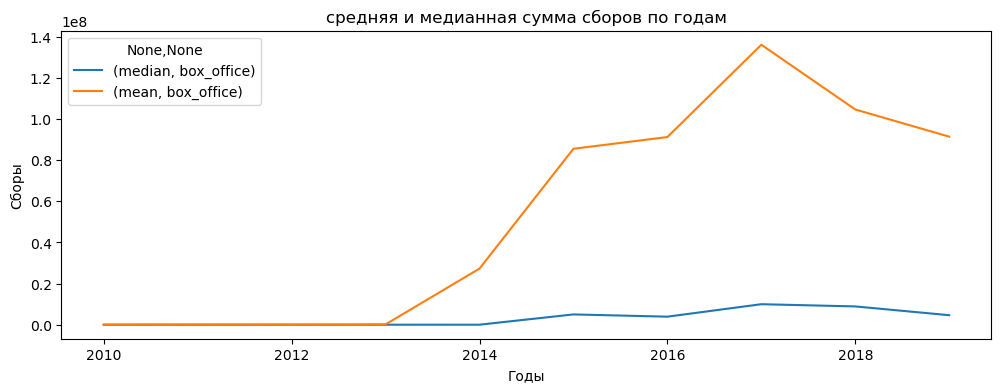

In [81]:
(data.pivot_table(index='year', values=['box_office'], aggfunc=['mean', 'median'])
.plot(figsize=(12,4), title='средняя и медианная сумма сборов по годам', kind='line', y=['median', 'mean'], ylabel='Cборы', xlabel='Годы'));

Данные до 2014 года имеют проблему. Средняя и медиана до 2014 сильно отличаются. После 2014 она тоже отличается сильно, на графике отчетливо видно.

In [82]:
data.nlargest(5, ['box_office']) #Самые кассовые фильмы по нашим данным

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support,year,head_director,genres_head,support_ratio
7456,холоп,111021719,2019-12-19 12:00:00+00:00,художественный,"ооо ""мем-медиа"" по заказу ао ""вбд груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12,25000000.0,...,160000000.0,фонд кино,6.8,комедия,3.073569e+09,60000000.0,2019,К.Шипенко,комедия,0.375000
5653,движение вверх,111011817,2017-12-21 12:00:00+00:00,художественный,"ооо ""студия ""тритэ"" никиты михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6,0.0,...,590192191.0,фонд кино,7.5,"спорт,драма",2.779686e+09,400000000.0,2017,А.Мегердичев,спорт,0.677745
6820,мстители: финал,121005519,2019-04-29 12:00:00+00:00,художественный,марвел студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,16,NaN,...,NaN,unknown,7.6,"фантастика,боевик,драма",2.576614e+09,NaN,2019,Джо Руссо,фантастика,NaN
6549,т-34,111024918,2018-12-21 12:00:00+00:00,художественный,"ооо ""кинокомпания марс-фильм"" по заказу ооо ""м...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",12,60000000.0,...,563784717.0,фонд кино,6.5,"драма,военный,боевик",2.271754e+09,180000000.0,2018,А.Сидоров,драма,0.319271
3488,пираты карибского моря: мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,художественный,"джерри брукхаймер филмз, уолт дисней пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,16,NaN,...,NaN,unknown,6.6,"фэнтези,боевик,комедия",2.118396e+09,NaN,2017,Йоаким Реннинг,фэнтези,NaN


Кажется,что рост среднего связан с отдельными кассовыми фильмами, которые пришлись на период 17-19 годов. Похоже есть фильмы, которые собирают значительную сумму кассовых сборов. Притом это происходит каждый год, ведь медиана и среднее посчитаны у нас по годам.

**Рассмотрим влияние возрастного ограничения аудитории («6+», «12+», «16+», «18+») с 2015 огда**

In [83]:
data.query('year >= 2015').pivot_table(index='age_restriction', values='box_office', aggfunc=['mean','median'])

,mean,median
,box_office,box_office
age_restriction,,
0,8.989749e+06,2949626.65
6,1.760209e+08,13736207.98
12,1.746958e+08,5175580.50
16,9.468834e+07,5604702.00
18,5.146416e+07,6154439.17


Рассмотрим сумму сборов по годам 

In [84]:
data.query('year >= 2015').pivot_table(index='age_restriction', values='box_office', columns='year', aggfunc='sum')

year,2015,2016,2017,2018,2019
age_restriction,,,,,
0,3.790546e+08,1.502288e+08,2.295989e+08,3.244900e+07,1.774607e+07
6,8.701799e+09,1.205315e+10,1.208614e+10,1.010497e+10,1.285255e+10
12,1.361608e+10,1.220445e+10,7.851428e+09,1.426729e+10,1.268020e+10
16,1.136812e+10,1.666455e+10,1.874504e+10,1.650360e+10,1.275342e+10
18,5.432308e+09,6.793930e+09,9.651496e+09,8.760086e+09,1.012180e+10


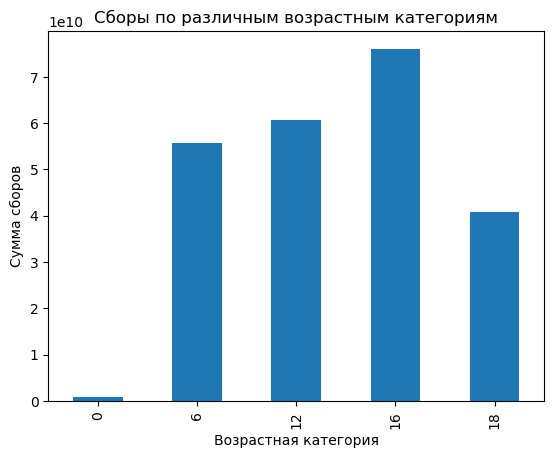

In [85]:
data.query('year >= 2015').groupby('age_restriction')['box_office'].sum().plot(y=['age_restriction'] , kind='bar', title='Сборы по различным возрастным категориям', ylabel='Cумма сборов', xlabel='Возрастная категория');

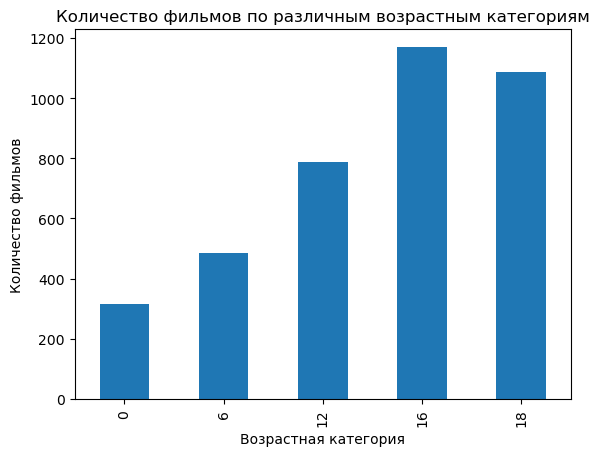

In [86]:
data.query('year >= 2015').groupby('age_restriction')['year'].count().plot(y=['age_restriction'], kind='bar', title='Количество фильмов по различным возрастным категориям', ylabel='Количество фильмов', xlabel='Возрастная категория');

Наибольшая сумма сборов у фильмов 16+, а наименьшая у фильмов 0+. Фильмов категории с низким возрастным ограничением значительно меньше.

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


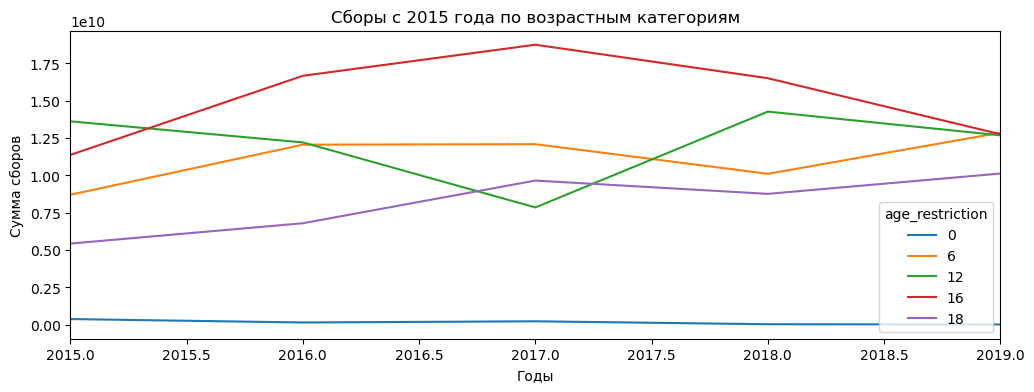

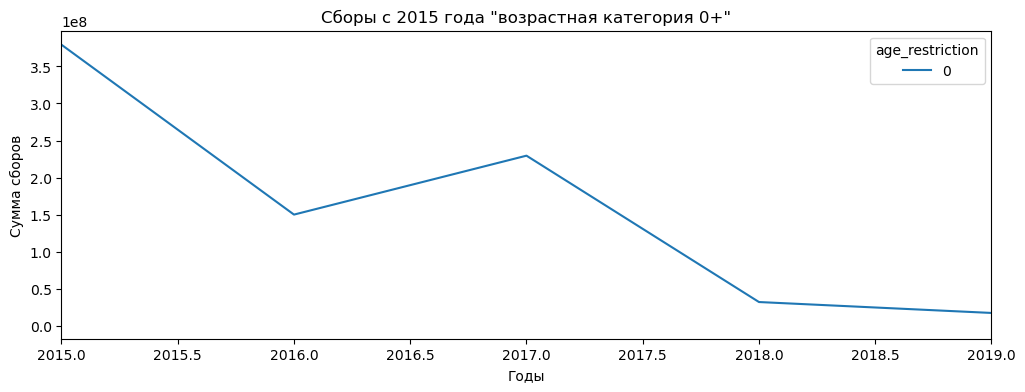

In [87]:
print((data.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
.plot(title='Сборы с 2015 года по возрастным категориям', kind='line',ylabel='Сумма сборов', xlabel='Годы', xlim=[2015, 2019], figsize=(12,4))));
print((data.query('age_restriction ==0').pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
.plot(title='Сборы с 2015 года "возрастная категория 0+"', kind='line',ylabel='Сумма сборов', xlabel='Годы', xlim=[2015, 2019], figsize=(12,4))));

**Самые кассовые фильмы**

In [88]:
l = data.pivot_table(index=['title','year', 'genres_head', 'ratings', 'age_restriction'], values=['box_office']).reset_index()
l.nlargest(5, ['box_office'])

,title,year,genres_head,ratings,age_restriction,box_office
2928,холоп,2019,комедия,6.8,12,3.073569e+09
669,движение вверх,2017,спорт,7.5,6,2.779686e+09
1591,мстители: финал,2019,фантастика,7.6,16,2.576614e+09
2672,т-34,2018,драма,6.5,12,2.271754e+09
2034,пираты карибского моря: мертвецы не рассказыва...,2017,фэнтези,6.6,16,2.118396e+09


Наиболее кассовым для кинотеатров получился 2017 год. Изменения в предпочтенях по возрастным категориям фильмов у зрителей в период с 2015 по 2019 год не произошло. Отдельно рассмотрев значение сборов в категории "0+" можно видить снижение на протяжении всего периода.

**Вывод:**

Максимальная сумма сборов была в 2019 году и составила 49 млрд руб. Значительный скачок роста сборов происходил в период с 2014 года по 2016 год.
Наибольшая сумма сборов у фильмов в категории '16+', а наименьшая у фильмов '0+'. Количество фильмов в категории с низким возрастным ограничением значительно меньше.
На графике суммарных кассовых сборов мы видели, что у нас за последние 4 года сборы изменяются не сильно. Максимальные сборы были в 2019 году.Значительных изменений сумма сборов в разбивке по возрастным категориям в период с 2015 по 2019 год не произошло. Отдельно рассмотрев значение сборов в категории "0+" можно видить снижение на протяжении всего периода.
Самым кассовымими фильмами стал фильм Холоп, даже обогнав зарубежные фильмы с более высоким рейтингом. Топ-5 самых кассовых фильмов приходится на 2017(2), 2019(2), 2018(1).

# Рассмотрим фильмы, которые получили государственную поддержку

**Cколько средств выделяют на поддержку кино**

In [89]:
data_supported = data.query('support > 0') #в переменную data_supported сохраним фильмы с господдержкой
data_supported.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support,year,head_director,genres_head,support_ratio
1281,пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0.0,...,79411900.0,министерство культуры,8.1,"драма,мелодрама",365353.6,26500000.0,2013,А.Атанесян,драма,0.333703
1448,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",Россия,А.Якимчук,А.Тютрюмов,12,0.0,...,37142857.0,министерство культуры,0.0,unknown,28140.0,26000000.0,2014,А.Якимчук,unknown,0.700000
1498,невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.0,...,176023490.0,фонд кино,5.3,"комедия,фантастика",19957031.5,107847945.0,2013,Р.Давлетьяров,комедия,0.612691
1524,берцы,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0.0,...,40574140.0,министерство культуры,4.2,драма,55917.5,28000000.0,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,братья ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0.0,...,40015122.0,министерство культуры,6.4,драма,232100.0,25000000.0,2014,М.Угаров,драма,0.624764


In [90]:
data_supported['profit'] = data['box_office'] - data['budget'] #запишем в переменную profit рентабельность господдержки

/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_67483/2657824437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_supported['profit'] = data['box_office'] - data['budget'] #запишем в переменную profit рентабельность господдержки


Рассмотрим количество профиносированных проектов финансирования в разбивке по источникам

In [91]:
data_supported['financing_source'].value_counts()

министерство культуры               164
фонд кино                           146
министерство культуры, фонд кино     22
Name: financing_source, dtype: int64

Рассмотрим объем финансирования в разбивке по источникам

In [92]:
data_supported.groupby('financing_source')['support'].sum()

financing_source
министерство культуры               4.836661e+09
министерство культуры, фонд кино    1.185431e+09
фонд кино                           1.417860e+10
Name: support, dtype: float64

Средства выделяются в основном министерством культуры. Также средства выделяют Фонд кино или они действую совместно. При этом количество проектов у огранизаций не сильно отличается.

In [93]:
data_supported.groupby('year')['support'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2013,2.0,6.717397e+07,5.752168e+07,26500000.0,46836986.25,67173972.5,87510958.75,107847945.0
2014,16.0,3.575014e+07,1.985036e+07,20000000.0,25000000.00,27500000.0,34125574.75,90000000.0
2015,86.0,4.251444e+07,3.552687e+07,4700000.0,25000000.00,30000000.0,48750000.00,250000000.0
2016,61.0,7.054353e+07,9.044321e+07,6000000.0,25200000.00,35000000.0,65000000.00,450000000.0
2017,41.0,7.765785e+07,9.444737e+07,6000000.0,30000000.00,40000000.0,75000000.00,400000000.0
2018,56.0,6.155303e+07,4.981732e+07,15000000.0,29500000.00,45000000.0,72500000.00,260000000.0
2019,70.0,7.005714e+07,9.240285e+07,3000000.0,30000000.00,40000000.0,60000000.00,500000000.0


Наибольшая поддержка была предоставлена в 2016 году, а наименьшая в 2014. Максимальное количество профинансированных проектов было в 2015 году(81). Но кажется, что выборка маленькая.

Рассмотрим как менялась общая сумма поддержки по годам.

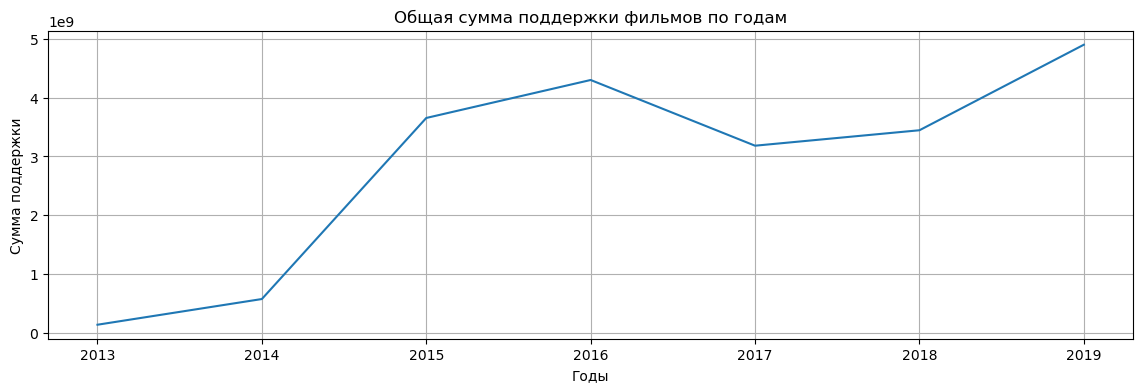

In [94]:
data_supported.groupby('year')['support'].sum().plot(y=['age_restriction'],figsize=(14,4), title='Общая сумма поддержки фильмов по годам',ylabel='Сумма поддержки', xlabel='Годы', grid=True);

Суммы поддержки растут. Также количество фильмов, получавших поддержку изменяется год к году .

**Рассмотрим окупаемость фильмов**

In [95]:
data_supported.pivot_table(index='year', values=['support','profit', 'box_office'], aggfunc='sum')

,box_office,profit,support
year,,,
2013,2.032239e+07,-2.351130e+08,1.343479e+08
2014,1.017422e+09,-2.995196e+08,5.720023e+08
2015,5.785285e+09,-2.181039e+09,3.656241e+09
2016,6.081708e+09,-1.659441e+09,4.303155e+09
2017,1.086508e+10,3.860075e+09,3.183972e+09
2018,9.934069e+09,2.714055e+09,3.446969e+09
2019,8.409627e+09,-2.938588e+09,4.904000e+09


Получается, что фильмы окупилсь только в 2017 и 2018 годах.

**Самые кассовые фильмы с господдержкой**

In [96]:
n = data_supported.pivot_table(index=['title', 'ratings', 'genres_head', 'profit', 'support'], values='box_office')
n.nlargest(5, ['box_office'])

,,,,,box_office
title,ratings,genres_head,profit,support,
холоп,6.8,комедия,2.913569e+09,60000000.0,3.073569e+09
движение вверх,7.5,спорт,2.189494e+09,400000000.0,2.779686e+09
т-34,6.5,драма,1.707969e+09,180000000.0,2.271754e+09
последний богатырь,6.8,комедия,1.302560e+09,100000000.0,1.655038e+09
лёд,0.0,unknown,1.297147e+09,85000000.0,1.445732e+09


**Наибольшые суммы государственной поддержки получили фильмы:**

In [97]:
o = data_supported.pivot_table(index=['title', 'ratings', 'genres_head', 'profit', 'box_office'], values='support').sort_values(by='support', ascending=False)
o.nlargest(5, ['support'])

,,,,,support
title,ratings,genres_head,profit,box_office,
союз спасения,6.0,история,-2.622968e+08,7.177032e+08,500000000.0
дуэлянт,6.6,драма,-3.199154e+08,3.642851e+08,450000000.0
экипаж .,7.6,драма,7.669715e+08,1.402255e+09,442104482.0
движение вверх,7.5,спорт,2.189494e+09,2.779686e+09,400000000.0
легенда о коловрате,6.4,история,9.039234e+07,5.904051e+08,350000000.0


**Самые рентабельные фильмы с господдержкой:**

In [98]:
w = data_supported.query('profit>0').pivot_table(index=['title', 'ratings', 'genres_head', 'box_office', 'support'], values=['profit'])
w.nlargest(5, ['profit'])

,,,,,profit
title,ratings,genres_head,box_office,support,
холоп,6.8,комедия,3.073569e+09,60000000.0,2.913569e+09
движение вверх,7.5,спорт,2.779686e+09,400000000.0,2.189494e+09
т-34,6.5,драма,2.271754e+09,180000000.0,1.707969e+09
последний богатырь,6.8,комедия,1.655038e+09,100000000.0,1.302560e+09
лёд,0.0,unknown,1.445732e+09,85000000.0,1.297147e+09


**Топ-5 самых нерентабельных фильмов с поддержкой:**

In [99]:
g = data_supported.pivot_table(index=['title','ratings'], values=['profit'])
g.nsmallest(5, ['profit'])

,,profit
title,ratings,
тайна печати дракона,5.8,-1.971477e+09
грех,6.9,-7.256988e+08
матильда,7.7,-5.211304e+08
территория,6.8,-4.274217e+08
девятая,5.8,-3.978278e+08


**Жанры, рейтинг, режисеры**

Рассмотрим среднюю рентабельность господдержки по различным жанрам 

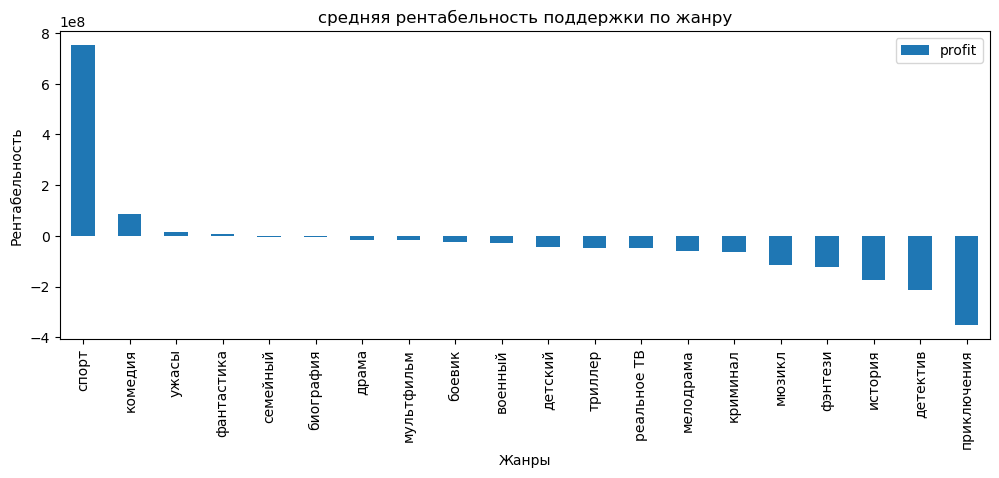

In [100]:
data_supported.query('genres_head != "unknown"').pivot_table(index='genres_head', values='profit', aggfunc='mean').sort_values(by='profit', ascending=False).plot(figsize=(12,4), title='средняя рентабельность поддержки по жанру', kind='bar', ylabel='Рентабельность', xlabel='Жанры');


Значительно лучше окупаются фильмы со спортивной тематикой(фильм 'Движение вверх' сильно завышает среднее) и комедии.

Рассмотрим количество фильмов с господдержкой в разбивке по жанрам.

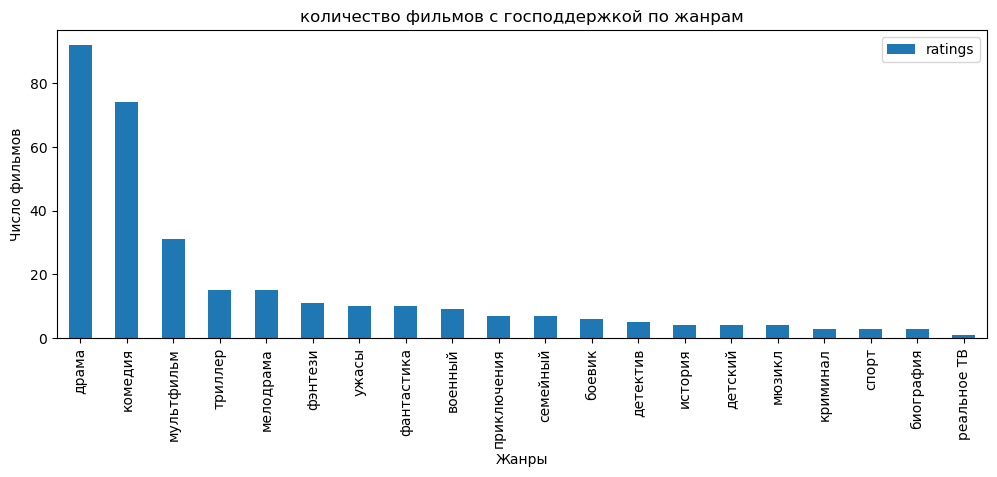

In [101]:
data_supported.query('ratings > 0').pivot_table(index='genres_head', values='ratings', aggfunc='count').sort_values(by='ratings', ascending=False).plot(figsize=(12,4),title='количество фильмов с господдержкой по жанрам', ylabel='Число фильмов', xlabel='Жанры', kind='bar');

Чаще всего  поддержку получают фильмы в жанре драма и комедия.

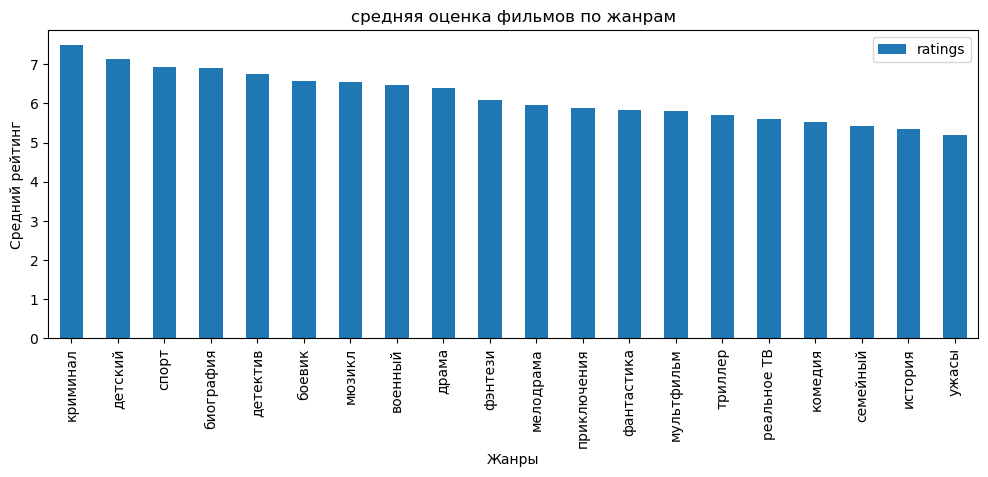

In [102]:
data_supported.query('ratings > 0').pivot_table(index='genres_head', values='ratings', aggfunc='mean').sort_values(by='ratings', ascending=False).plot(figsize=(12,4), title='средняя оценка фильмов по жанрам', ylabel='Средний рейтинг', xlabel='Жанры' , kind='bar');

Удивительно, но самый высокий средний рейтинг у фильмов с господдержкой в жанре криминал

Рассмотри в каких жанрах лучшие оценки полчали фильмы с господдержкой

In [103]:
data_supported.query('ratings >0').pivot_table(index=['genres_head'], values='ratings', aggfunc=['mean', 'median', 'min', 'max'])

,mean,median,min,max
,ratings,ratings,ratings,ratings
genres_head,,,,
биография,6.900000,6.90,6.3,7.5
боевик,6.583333,6.45,5.6,7.8
военный,6.466667,6.40,5.5,7.5
детектив,6.760000,6.80,5.8,7.6
детский,7.125000,7.25,6.7,7.3
драма,6.391304,6.40,2.9,8.5
история,5.350000,5.90,3.2,6.4
комедия,5.514865,5.75,1.0,7.4


Сравним рейтинги с фильмов с господдержкой и без (возьмем медиану)

In [104]:
data_supported.query('ratings >0')['ratings'].median() #медиана рейтинга получивших поддержку фильмов

6.2

In [105]:
data.query('financing_source == "unknown" and ratings >0')['ratings'].median() #медиана рейтинга фильмов не получивших поддержку

6.6

Получается, что фильмы не получившие поддержку имеют чуть более высокий рейтинг и наличие гос поддержки не гарантирует высокий рейтинг.

Рассмотрим фильмы с худшим и лучшим рейтингом 

In [106]:
data_supported.query('ratings >0').nsmallest(1, ['ratings'])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,support,year,head_director,genres_head,support_ratio,profit
3515,взломать блогеров,111016616,2016-10-28 12:00:00+00:00,художественный,"ооо ""таббак""",Россия,М.Свешников,Т.Бекмамбетов,6,0.0,...,фонд кино,1.0,"комедия,мультфильм,фантастика",7323648.0,25000000.0,2016,М.Свешников,комедия,0.694131,-28692621.0


In [107]:
data_supported.query('ratings >0').nlargest(1, ['ratings'])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,support,year,head_director,genres_head,support_ratio,profit
1870,а зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",Россия,Р.Давлетьяров,unknown,12,50000000.0,...,фонд кино,8.5,"драма,военный,история",249166767.7,150000000.0,2015,Р.Давлетьяров,драма,0.68,28578373.7


Фильмы с самым высоким рейтингом: а зори здесь тихие, а с минимальным: взломать блогеров

Рассмотрим возростные категории и величину господдержку 

In [108]:
data_supported.pivot_table(index = 'age_restriction', values = 'support', aggfunc = ['mean', 'median', 'min','max'])

,mean,median,min,max
,support,support,support,support
age_restriction,,,,
0,3.419000e+07,29500000.0,3000000.0,75000000.0
6,8.532883e+07,50000000.0,10000000.0,442104482.0
12,7.357919e+07,41750000.0,5000000.0,500000000.0
16,4.455243e+07,30000000.0,4700000.0,450000000.0
18,3.615525e+07,30000000.0,8000000.0,90000000.0


В основном государство поддерживает фильмы в категории 6 и 12+, фильмы рассчитанные на широкую зрительскую аудиторию.

**Каким режисерам больше всего выделяют денег:**

In [109]:
data_supported.pivot_table(index=['head_director'], values='support', aggfunc='sum').sort_values(by='support', ascending=False).head()

,support
head_director,
Н.Хомерики,660000000.0
Ф.Бондарчук,500000000.0
А.Кравчук,500000000.0
Р.Давлетьяров,459847945.0
А.Мизгирев,450000000.0


**Рейтинг режисеров:**

In [110]:
data_supported.query('ratings >0').pivot_table(index='head_director', values='ratings', aggfunc='median').sort_values(by='ratings', ascending=False).head()

,ratings
head_director,
А.Атанесян,8.1
А.Попова,8.0
К.Оганисян,7.9
И.Шахназаров,7.8
А.Андрианов,7.8


Больше всего выделили средств на фильмы Хомерики и Бондарчука. Рижесеры с лучшим рейтингом фильмов не очень много получают государственной поддержки.

# Вывод:

Максимальная сумма сборов была в 2019 году и составила 49 млрд руб. Значительный скачок роста сборов происходил в период с 2014 года по 2016 год.
Наибольшая сумма сборов у фильмов в категории '16+', а наименьшая у фильмов '0+'. Количество фильмов в категории с низким возрастным ограничением значительно меньше.
Наиболее кассовым для кинотеатров получился 2017 год. Значительных изменений сумма сборов в разбивке по возрастным категориям в период с 2015 по 2019 год не произошло. Отдельно рассмотрев значение сборов в категории "0+" можно видить снижение на протяжении всего периода.
Самым кассовымими фильмами стал фильм Холоп, даже обогнав зарубежные фильмы с более высоким рейтингом. Топ-5 самых кассовых фильмов приходится на 2017(2), 2019(2), 2018(1).


Господдержку российских фильмов осуществляет 'Фонд кино' и министерство культуры. Большую часть средств выделяются в основном министерством культуры. Также средства выделяют 'Фонд кино' или они действуют совместно финансирую один проект. При этом количество финансируемых проектов у огранизаций отличается не сильно.
Суммы поддержки ежегодно растут. Наибольшая поддержка была предоставлена в 2016 году, а наименьшая в 2014. Максимальное количество профинансированных проектов было в 2015 году(81). В целом фильмы окупилсь только в 2017 и 2018 годах.

*Самый кассовый фильм с господдержкой: "Холоп"
*Наибольшую сумму государственной поддержки получил фильм: "союз спасения"
*Самый рентабельный фильмй с господдержкой: "Экипаж" 
*Самый нерентабельный фильм с поддержкой: "Грех"

В среднем фильмы не получившие поддержку имеют чуть более высокий рейтинг(6.6) и наличие гос поддержки не гарантирует высокий рейтинг(6.2). Значительно лучше окупаются фильмы со спортивной тематикой и комедии. Чаще всего поддержку получают фильмы в жанре драма и комедия. Удивительно, но самый высокий средний рейтинг у фильмов с господдержкой в жанре криминал. В основном государство поддерживает фильмы в категории 6+ и 12+.

*Фильмы с самым высоким рейтингом:'А зори здесь тихие', а с минимальным:'Взломать блогеров'

Больше всего выделяют денег на фильмы Хомерики и Бондарчука. Рижесеры с лучшим рейтингом фильмов не очень много получают государственной поддержки.



